# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [227]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [228]:



###############################################################################################################

##########################  CHECK THAT WE CAN IMPLEMENT THE FUNCTION BY REVERSE H:   ########################## 




# h*x(i) = somme(k = -infini to + infini)[h(k)* x(i - k)] 

# We put h(k) = 0 if k doesn't belong to [0,1]
# So:  h*x(i) = somme(k = 0 to 1)[h(k)* x(i - k)]




# Move h_inv to the right:



#                                                    //Formula: i = 0, h*x(0)?

#               first term = h_inv(0)*x(-1)          //Formula:   k = 0    first term = h(0)*x(0)
#              second term = h_inv(1)*x(0)           //Formula:   k = 1   second term = h(1)*x(-1)





# h*x(0) =  first term + second term  = h_inv(0)*x(-1) + h_inv(1)*x(0)   =  h(0)*x(0) + h(1)*x(-1)








###############################################################################################################

##########################  FIND THE FORMULA TO COMPUTE CONVOLUTION BY REVERSE H :   ##########################




#x = [1 2 3 4]
#h_inv = [-1 1]

# h*x(i) = 0 if i < 0
# h*x(0) =  h_inv(0)*x(-1) + h_inv(1)*x(0)
# h*x(1) =  h_inv(0)*x(0)  + h_inv(1)*x(1)
# h*x(2) =  h_inv(0)*x(1)  + h_inv(1)*x(2)
# h*x(3) =  h_inv(0)*x(2)  + h_inv(1)*x(3)
# h*x(4) =  h_inv(0)*x(3)  + h_inv(1)*x(4)
# h*x(i) = 0 if i > 4


# h*x(i) =  h_inv(0)*x(i-1)  + h_inv(1)*x(i)





#If h > x: (it's the same)
#x = [0 1 2]
#h_inv = [1 1 1 1]


# h*x(i) = 0 if i < 0
# h*x(0) =  h_inv(0)*x(-3) + h_inv(1)*x(-2) + h_inv(2)*x(-1) + h_inv(3)*x(0)
# h*x(1) =  h_inv(0)*x(-2) + h_inv(1)*x(-1) + h_inv(2)*x(0)  + h_inv(3)*x(1)
# h*x(2) =  h_inv(0)*x(-1) + h_inv(1)*x(0)  + h_inv(2)*x(1)  + h_inv(3)*x(2)
# h*x(3) =  h_inv(0)*x(0)  + h_inv(1)*x(1)  + h_inv(2)*x(2)  + h_inv(3)*x(3)
# h*x(4) =  h_inv(0)*x(1)  + h_inv(1)*x(2)  + h_inv(2)*x(3)  + h_inv(3)*x(4)
# h*x(5) =  h_inv(0)*x(2)  + h_inv(1)*x(3)  + h_inv(2)*x(4)  + h_inv(3)*x(5)
# h*x(i) = 0 if i > 2




# convolution[0] = somme(k = 0 to size(h)-1, j = -size(h)+1 to 0)[h(k)*x(j)]
# convolution[1] = somme(k = 0 to size(h)-1, j = -size(h)+2 to 1)[h(k)*x(j)]

# convolution[i] = somme(k = 0 to size(h)-1, j = -size(h)+i to i)[h(k)*x(j)]








###############################################################################################################

##########################  IMPLEMENT THE ALGORITHM  ##########################################################



# 1 -1  
# 0  1  2  3  4  0  
# To make the convolution work, we need to add two zeros in x(k). 


# 1 -1 -1  1
# 0  0  0  1  2  3  4  0  0  0
# To make this convolution work, we need to add three zeros in x(k). 



# To make a convolution work, we need to add (size(h) - 1)*2 zeros in x(k), 
# if we have to begin the convolution with x[0]).


# Size(h*x) = size(x) + size(h) -1

    
# convolution[i] = somme(k = 0 to size(h)-1, j = -size(h)+i to i)[h(k)*x(j)]





def conv(h,x):
    h_inv = h[::-1]  
    conv = [0] * (len(x) + len(h) - 1)
    lenx = len(x);
    j = 0;
    Mem = 0;  # Mem is used to do the j loop and the k loop in the same time. 
    x = [0] * (len(h) - 1) + x + [0] * (len(h) - 1)
    for i in range(0, lenx + len(h) - 1 ):
        for k in range (0, len(h_inv)):
                conv[i] = conv[i] + h_inv[k] * x[j]
                j = j + 1
        Mem = Mem + 1
        j = Mem
    return conv
    

    
'''
#check: 

x = [1, 2, 3, 4]
h = [-1, 1]
conv_hx = conv(h,x)
print(conv_hx)


x = np.array([1, 2, 3, 4])
h = np.array([-1, 1])  # I tried with many different sequences 
np.convolve(h,x)
print(np.convolve(h,x)) 

'''
    
    
    
    
    
    






 

'\n#check: \n\nx = [1, 2, 3, 4]\nh = [-1, 1]\nconv_hx = conv(h,x)\nprint(conv_hx)\n\n\nx = np.array([1, 2, 3, 4])\nh = np.array([-1, 1])  # I tried with many different sequences \nnp.convolve(h,x)\nprint(np.convolve(h,x)) \n\n'

In [229]:


import math


x = [1, 2, 3, 4]


h = [-1, 1]
     

dirac = [1, 0, 0, 0, 0 ] #True dirac: [inf, 0, 0, 0, 0 ]

dirac = np.asarray(dirac)
H = np.fft.fft(dirac)



exp = [math.exp(1), math.exp(2), math.exp(3), math.exp(4)]


conv_hx = conv(h,x)
conv_diractx = conv(dirac,x)
conv_Hx = conv(H,x)
conv_expx = conv(exp,x)


print('conv_hx:')
print(conv_hx)


print('')
print('conv_diractx:')
print(conv_diractx)




print('')
print('conv_Hx:')
print(conv_Hx)



print('')
print('conv_expx:')
print(conv_expx)
print('')



h = [0]*5 + H

New_x = x

for i in range (0, 9):
     New_x = New_x + x
        

x_inv =  x[::-1] 
New_x_inv = x_inv

for i in range (0, 9): 
    New_x_inv = New_x_inv + x_inv
        

x_end = New_x_inv + New_x

conv_hx_3 = conv(h,x)

print('')
print('conv_hx_3:')
print(conv_hx_3)








    

conv_hx:
[-1, -1, -1, -1, 4]

conv_diractx:
[1, 2, 3, 4, 0, 0, 0, 0]

conv_Hx:
[(1+0j), (3+0j), (6+0j), (10+0j), (10+0j), (9+0j), (7+0j), (4+0j)]

conv_expx:
[2.718281828459045, 12.825619755848741, 43.0184946064261, 127.80951949014771, 199.00913523157408, 244.13659779218338, 218.39260013257694]


conv_hx_3:
[(1+0j), (3+0j), (6+0j), (10+0j), (10+0j), (9+0j), (7+0j), (4+0j)]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


'check:\nfrom scipy import signal\nrep = signal.convolve2d(h,x)\nprint(rep)\n\n'

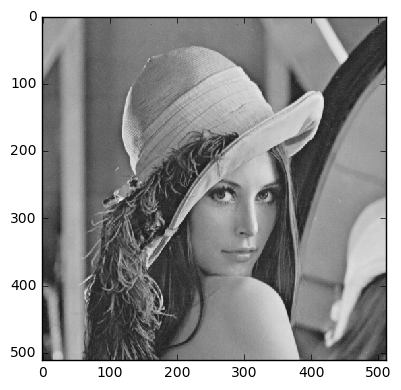

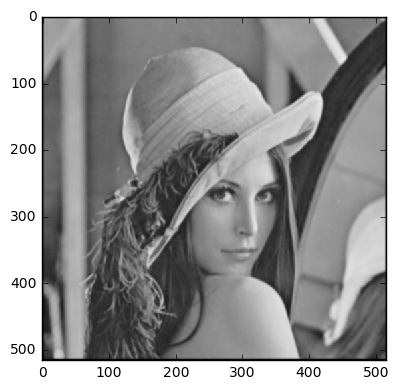

In [243]:
# convolution[i] = somme(k = 0 to size(h)-1, j = -size(h)+i to i)[h(k)*x(j)]


# convolution[i,l] = somme(k = 0 to size(h)-1, j = -size(h)+i to i, l = 0 to num_col(h) - 1, d = 0 to num_col(x))
#                                  [h(k,c)*x(j,d)]


Path = './../images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)
plt.figure()
io.imshow(lena_im)

K = 1/256*  np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6],[6, 16, 24, 16, 4], [1, 4, 6, 4, 1]])



# 1 -1 -1  1
# 0  0  0  1  2  3  4  0  0  0
# To make this convolution work, we need to add three zeros in x(k). 





def conv2D(h,x):
    h_inv = np.rot90(h)
    h_inv = np.rot90(h_inv)
    
    conv = np.zeros((x.shape[0] + h_inv.shape[0] - 1,  x.shape[1] + h_inv.shape[1] - 1))
    
    
    lenx1 = x.shape[1];
    lenx0 = x.shape[0];
    j = 0;
    Memj = 0;  # Mem is used to do the j loop and the k loop in the same time. 
    
    Temp = np.array([[0] * x.shape[1]]*(h_inv.shape[0]-1))  #Add the zeros in the borders 
    x = np.concatenate((Temp, x), axis=0)
    x = np.concatenate((x, Temp), axis=0)
    Temp = np.array([[0] * x.shape[0]]*(h_inv.shape[1]-1))
    Temp = Temp.transpose()
    x = np.concatenate((Temp, x), axis=1)
    x = np.concatenate((x, Temp), axis=1)
    
    d = 0
    Memd = 0
    
  
    
    for Memd in range(0, lenx0 + h_inv.shape[0] - 1 ):
        j = 0
        for i in range(0, lenx1 + h_inv.shape[1] - 1 ):
            for l in range (0, h_inv.shape[0]):
                for k in range (0, h_inv.shape[1]):
                    conv[Memd,i] = conv[Memd,i] + h_inv[l,k] * x[d,j]  
                    j = j + 1
                d = d + 1
                j = Memj 
            Memj = Memj + 1
            d = Memd
        Memj = 0
        Memd = Memd + 1
        d = Memd 
    return conv







lena_smooth = conv2D(K,lena_im)

plt.figure()
io.imshow(lena_smooth)




'''check:
from scipy import signal
rep = signal.convolve2d(h,x)
print(rep)

'''




'\n\nTemp = np.array([[0] * x.shape[1]]*(h.shape[0]-1))\n\n\nx = np.concatenate((Temp, x), axis=0)\n\nx = np.concatenate((x, Temp), axis=0)\n\n\n\nTemp = np.array([[0] * x.shape[0]]*(h.shape[1]-1))\n\nTemp = Temp.transpose()\n\nx = np.concatenate((Temp, x), axis=1)\n\nx = np.concatenate((x, Temp), axis=1)\n\nprint(x)  \n'

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

58.0
38 150
64 144
116 175
142 96
142 169
168 130
194 23
220 138
246 103
246 160
298 41


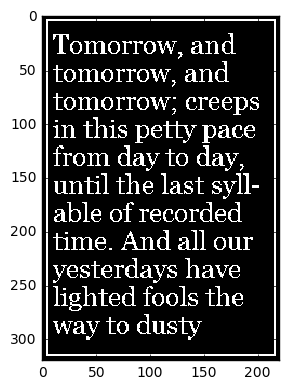

In [299]:
from skimage.filters import threshold_otsu
from scipy import signal
from skimage import color



a_im = io.imread(Path.__add__('a.png'))
a_im = img_as_float(a_im)

text_im = io.imread(Path.__add__('text.png'))
text_im = img_as_float(text_im)

a_im = color.rgb2gray(a_im)
text_im = color.rgb2gray(text_im)

thresh = threshold_otsu(text_im)
text_im = text_im <= thresh

thresh = threshold_otsu(a_im)
a_im = a_im <= thresh


'''

len_im1 = a_im.shape[1]   #Fill an image with 0 to have the same size of another image
len_im2 = a_im.shape[0]
len1    = (text_im.shape[1] - a_im.shape[1])/2
len2    = (text_im.shape[0] - a_im.shape[0])/2

             
Temp = np.array([[0] * len_im1] * int(len2))  

a_im = np.concatenate((Temp, a_im), axis=0)
a_im = np.concatenate((a_im, Temp), axis=0)


Temp = np.array([[0] * text_im.shape[0]] * int(len1))

Temp = Temp.transpose()
a_im = np.concatenate((Temp, a_im), axis=1)
a_im = np.concatenate((a_im, Temp), axis=1)

'''





def corr2D(h,x):
   
    
    corr = np.zeros((x.shape[0] + h.shape[0] - 1,  x.shape[1] + h.shape[1] - 1))
    
    
    lenx1 = x.shape[1];
    lenx0 = x.shape[0];
    j = 0;
    Memj = 0;  # Mem is used to do the j loop and the k loop in the same time. 
    
    Temp = np.array([[0] * x.shape[1]]*(h.shape[0]-1))  #Add the zeros in the borders 
    x = np.concatenate((Temp, x), axis=0)
    x = np.concatenate((x, Temp), axis=0)
    Temp = np.array([[0] * x.shape[0]]*(h.shape[1]-1))
    Temp = Temp.transpose()
    x = np.concatenate((Temp, x), axis=1)
    x = np.concatenate((x, Temp), axis=1)
    
    d = 0
    Memd = 0
    
  
    
    for Memd in range(0, lenx0 + h.shape[0] - 1 ):
        j = 0
        for i in range(0, lenx1 + h.shape[1] - 1 ):
            for l in range (0, h.shape[0]):
                for k in range (0, h.shape[1]):
                    corr[Memd,i] = corr[Memd,i] + h[l,k] * x[d,j]  
                    j = j + 1
                d = d + 1
                j = Memj 
            Memj = Memj + 1
            d = Memd
        Memj = 0
        Memd = Memd + 1
        d = Memd 
    return corr


corr = corr2D(a_im,text_im)


io.imshow(text_im)    

max_corr = np.max(corr)    
print(max_corr)
    

for i in range (0, corr.shape[0] ):
    for j in range(0, corr.shape[1]):
        if corr[i,j] == max_corr:
            print(i,j)
        
#corr = signal.correlate2d(a_im, text_im)


